In [78]:
from grover_num_list_cirq import find_num
#from quantum_operation import QuantumOperation
from qiskit.tools.visualization import plot_histogram
from backend_operation import run_simulator
from qiskit import Aer, transpile
from qiskit.transpiler.passes import RemoveBarriers

In [79]:
import random
import timeit

In [80]:
num_list_num = 5
data_arr = list(range(num_list_num))
random.shuffle(data_arr)
win = random.sample(data_arr, 1)

print(f"Data array: {data_arr} , the winner: {win}")

Data array: [1, 4, 3, 0, 2] , the winner: [0]


In [81]:
st = timeit.default_timer()
sol = []
for i, val in enumerate(data_arr):
    if val in win:
        sol.append(i)
        
end = timeit.default_timer()
print(f"Time: {end - st} , solution : {sol}")

Time: 0.00033109996002167463 , solution : [3]


In [82]:
block_diagram = True
qc_size = 4

c:\Users\User\anaconda3\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


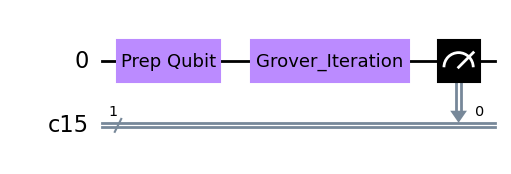

In [83]:
grover_find_value_win_size = find_num()
grover_find_value_win_size.build_iteration(win, block_diagram=block_diagram)
grover_find_value_win_size.create_grover(block_diagram=block_diagram)
experiments = grover_find_value_win_size.measure_qc
print(experiments)
experiments[0].draw('mpl')

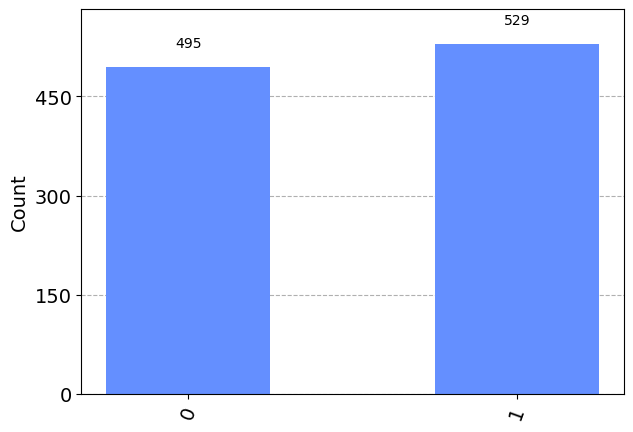

In [84]:
result = run_simulator(experiments[0])
plot_histogram(result.get_counts())

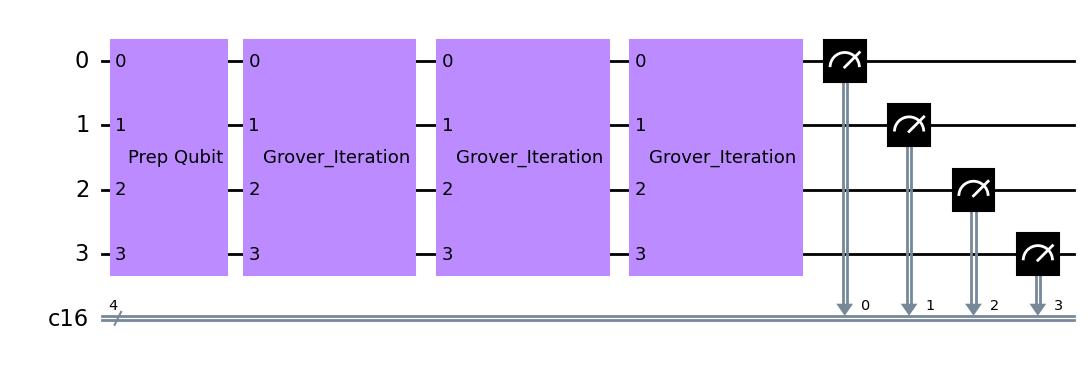

In [85]:
grover_find_value = find_num()
grover_find_value.build_iteration(win, block_diagram=block_diagram, data = qc_size)
grover_find_value.create_grover(block_diagram=block_diagram)
experiments = grover_find_value.measure_qc
print(experiments)
experiments[0].draw('mpl')

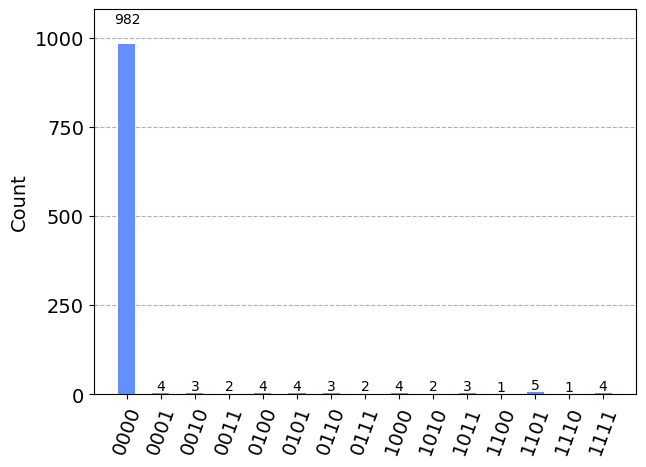

In [86]:
result = run_simulator(experiments[0])
plot_histogram(result.get_counts())

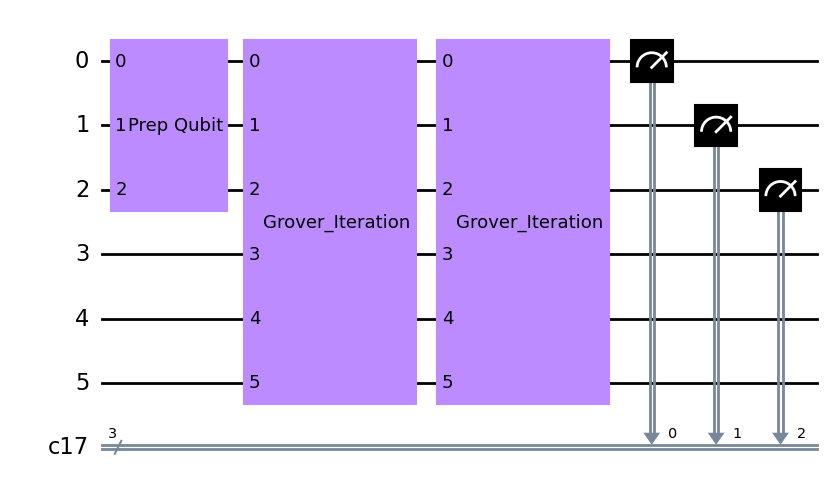

In [87]:
grover_find_value_list = find_num()
grover_find_value_list.build_iteration(win, block_diagram=block_diagram, data = data_arr)
grover_find_value_list.create_grover(block_diagram=block_diagram)
experiments = grover_find_value_list.measure_qc
print(experiments)
experiments[0].draw('mpl')

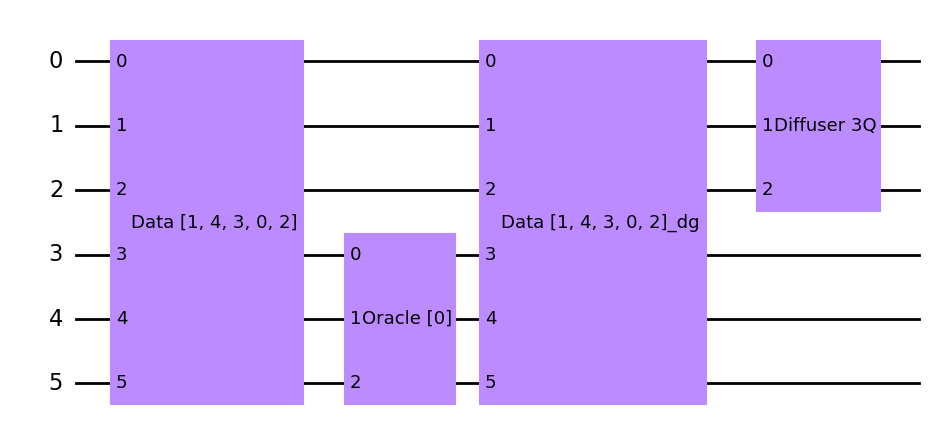

In [88]:
grover_find_value_list.iteration_qc.draw('mpl')

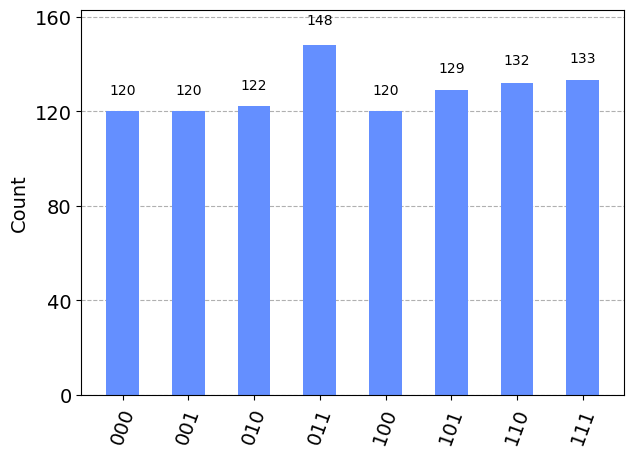

In [89]:
result = run_simulator(experiments[0])
plot_histogram(result.get_counts())

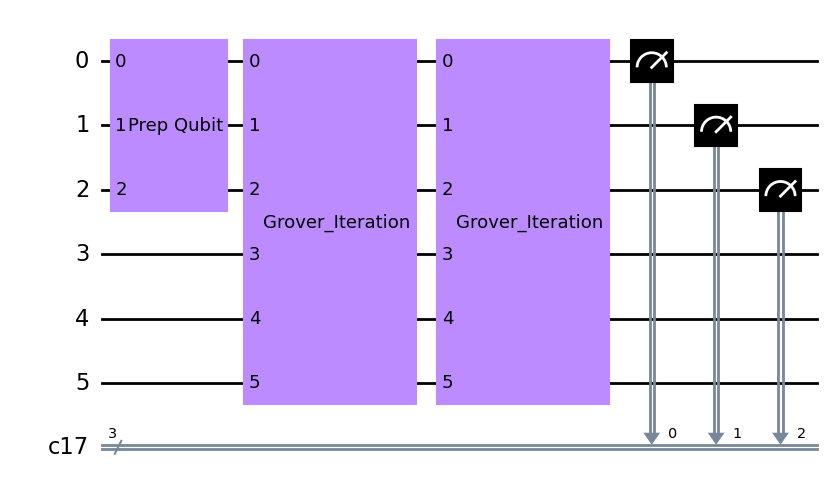

In [90]:
#Removing barriars from circuit
no_barriar_circuit = RemoveBarriers()(experiments[0])
no_barriar_circuit.draw('mpl')

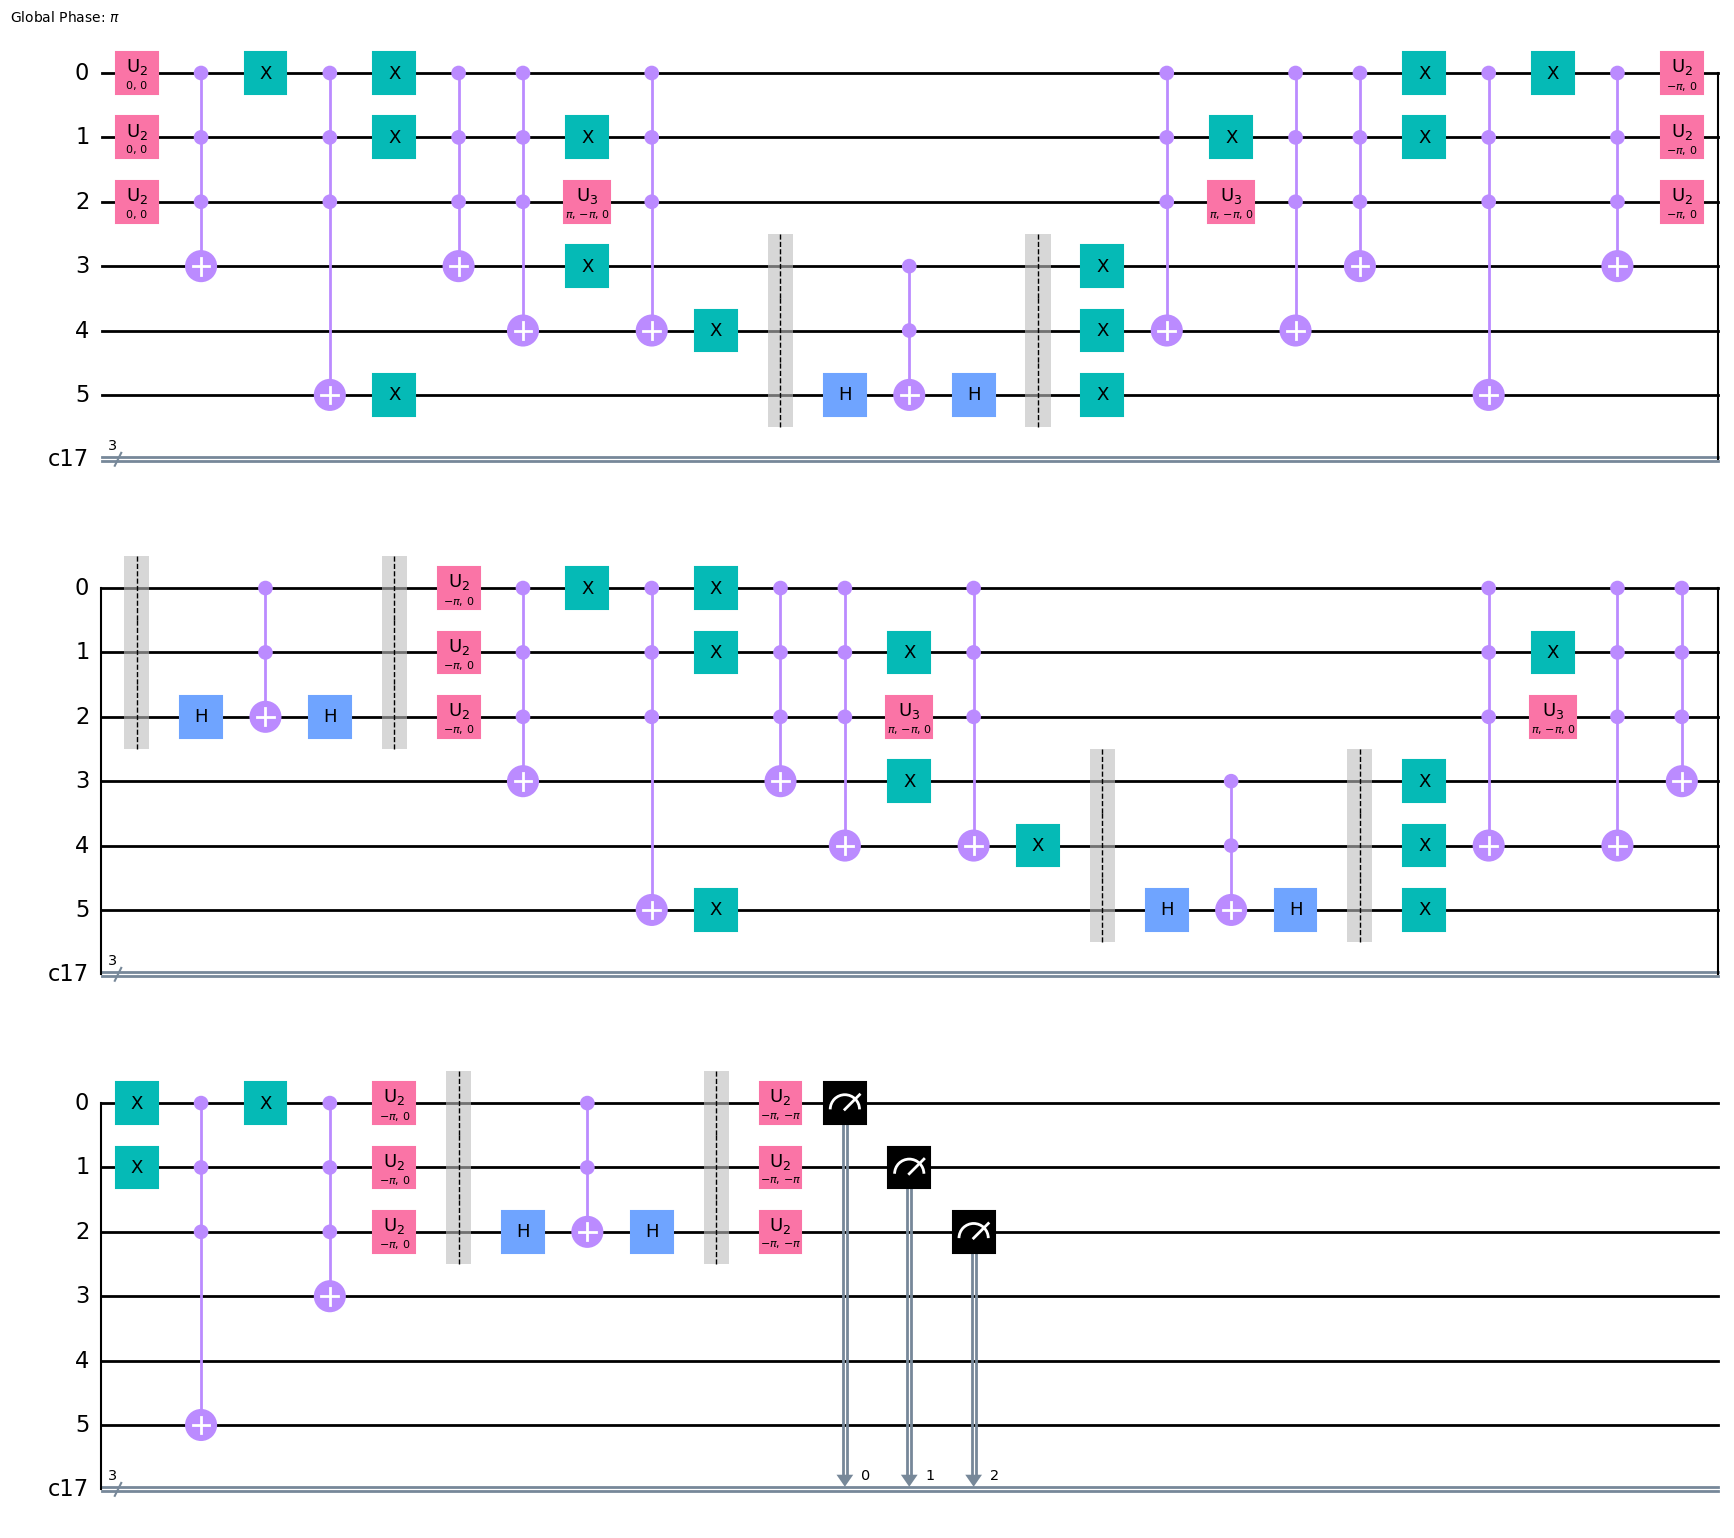

In [91]:
#After transpiling
run_qc_transpile = transpile(no_barriar_circuit, Aer.get_backend('aer_simulator'), optimization_level=3)
run_qc_transpile.draw('mpl')

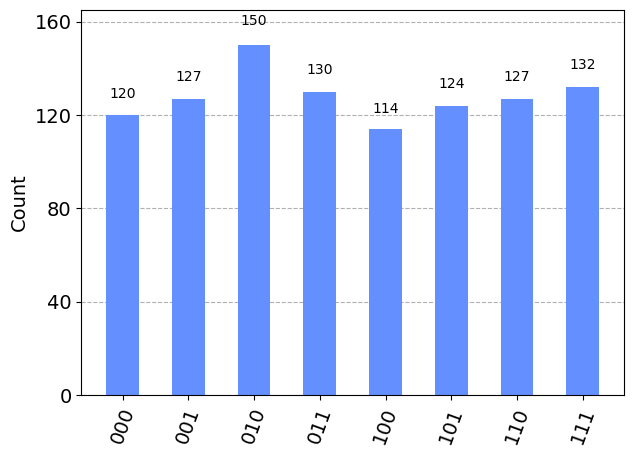

In [92]:
result = run_simulator(run_qc_transpile)
plot_histogram(result.get_counts())

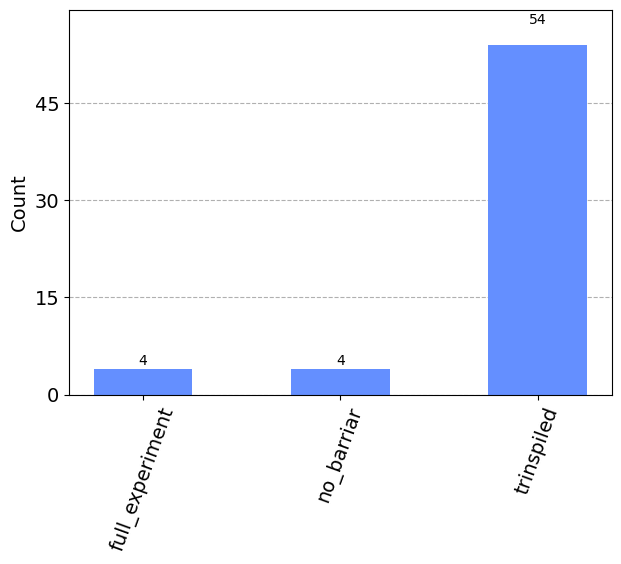

In [93]:
plot_histogram({
    'full_experiment' : experiments[0].depth(),
    'no_barriar' : no_barriar_circuit.depth(),
    'trinspiled' : run_qc_transpile.depth()
})